In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pickle
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from ipywidgets import interactive
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_pkl(filename):
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    return data

In [3]:
colors = ['black', 'steelblue',  
          'red', 'red','red', 'red', 'red','red',
          'lime', 'lime', 'lime', 'lime', 'lime', 'lime']
colors2 = ['black', 'steelblue', 'goldenrod', 
          'forestgreen', 'deeppink','red',
          'lime', 'magenta','saddlebrown', 'olivedrab','salmon']

In [4]:
max_rb = 1

def plot_memory_and_rb3_5subplots(info_policy, n_run, flag_derivative=False):
    %matplotlib inline
    memory=info_policy.iloc[n_run]['memory']
    rb_in=info_policy.iloc[n_run]['rb_in']
    rb_in_norm = [x / max_rb for x in rb_in]
    rb_out=info_policy.iloc[n_run]['rb_out']
    rb_out_norm = [x / max_rb for x in rb_out]
    memory_neighbors_dicts=info_policy.iloc[n_run]['memory_neighbors']
    dropped_low=info_policy.iloc[n_run]['dropped_low_over_time']
    dropped_medium=info_policy.iloc[n_run]['dropped_medium_over_time']
    dropped_high=info_policy.iloc[n_run]['dropped_high_over_time']
    time=range(len(memory))
    fig, axs = plt.subplots(5,1,figsize=(10,14))
    axs[1].plot(time, memory, 'r-', label='memory')
    axs[0].plot(time, 11*np.array(rb_in_norm), 'b-', label='$\mathregular{Rb_{in}}$') 
    axs[0].plot(time, rb_out_norm, 'g-', label='$\mathregular{Rb_{out}}$') 
#     axs[0].plot(time, 11*np.array(rb_in_norm), 'b-', label='PRX date rate') 
#     axs[0].plot(time, rb_out_norm, 'g-', label='DTE data rate')
    if flag_derivative:
        dropped_low_dot = [0]
        dropped_medium_dot = [0]
        dropped_high_dot = [0]
        for i in range(1,len(dropped_low)):
            dropped_low_dot.append(dropped_low[i]-dropped_low[i-1])
            dropped_medium_dot.append(dropped_medium[i]-dropped_medium[i-1])
            dropped_high_dot.append(dropped_high[i]-dropped_high[i-1])
        axs[2].plot(time, dropped_low_dot, 'k-')
        axs[3].plot(time, dropped_medium_dot, 'k-')
        axs[4].plot(time, dropped_high_dot, 'k-')
    else:    
        axs[2].plot(time, dropped_low, 'k-')
        axs[3].plot(time, dropped_medium, 'k-')
        axs[4].plot(time, dropped_high, 'k-')

    axs[2].set_yscale('log')
    axs[3].set_yscale('log')
    axs[4].set_yscale('log')
    axs[0].set_yscale('log')
    axs[4].set_xlabel('time step')  # Add an x-label to the axes.
    axs[1].set_ylabel('Memory utilization')  # Add a y-label to the axes.
    axs[0].set_ylabel('Data Rate [bps]')  # Add a y-label to the axes.
    axs[2].set_ylabel('low priority')
    axs[3].set_ylabel('medium priority')
    axs[4].set_ylabel('high priority')
    axs[1].set_ylim(0, 1) 
    axs[0].set_ylim(1e9/512, 10e9) 
#     axs[0].set_title('Mean reward for this policy: {}'.format(str(np.mean(info_policy['reward']))))  
    axs[0].set_title('Gateway')  
    axs[1].legend()  # Add a legend.
    axs[0].legend(loc='lower right')  # Add a legend.

In [5]:
#----------------------------------------------------------------------------

In [7]:
filename43 = './training_Lunar_priorities/hybrid_approach/'
filename46 = './training_Lunar_priorities/full_RL_approach/'


data8 = read_pkl(filename43+'evaluation_0.001_best_avg_model.pkl') ##

data16 = read_pkl(filename46+'evaluation_0.01_best_avg_model.pkl') #
data17 = read_pkl(filename46+'evaluation_0.01_best_max_model.pkl')
data18 = read_pkl(filename46+'evaluation_0.001_best_avg_model.pkl')
data19 = read_pkl(filename46+'evaluation_0.001_best_max_model.pkl')

In [8]:
data_to_plot = data8

In [9]:
columns=[i for i in range(100)]

def k(run_number):
    print('Episode reward = {}'.format(data_to_plot['reward'][run_number]))
    plot_memory_and_rb3_5subplots(data_to_plot, run_number, True)
    
interactive_plot = interactive(k, run_number=columns)
interactive_plot

interactive(children=(Dropdown(description='run_number', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

In [10]:
def plot_boxplot_comparison(data):
    fig, axs = plt.subplots(5,1,figsize=(9,15))
    
    axs[0].set_ylabel('cum benefit [bits]')
    axs[1].set_ylabel('cum cost [bits]')
    axs[2].set_ylabel('drops low priority [bits]')
    axs[3].set_ylabel('drops medium priority [bits]')
    axs[4].set_ylabel('drops high priority [bits]')
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    axs[2].set_yscale('log')
    axs[3].set_yscale('log')
    axs[4].set_yscale('log')

    data_benefit = [data[0]['benefit'], data[1]['benefit']]
    axs[0].boxplot(data_benefit)
    axs[0].set_xticklabels(['Hybrid','Full RL'])
    data_cost = [data[0]['cost'], data[1]['cost']]
    axs[1].boxplot(data_cost)
    axs[1].set_xticklabels(['Hybrid','Full RL'])
    
    data_low_1=[]
    data_low_2=[]
    for i in range(100):
        data_low_1.append(data[0].iloc[i]['dropped_low_over_time'][-1])
        data_low_2.append(data[1].iloc[i]['dropped_low_over_time'][-1])
    data_low = [data_low_1, data_low_2]
    axs[2].boxplot(data_low)
    axs[2].set_xticklabels(['Hybrid','Full RL'])
    
    data_med_1=[]
    data_med_2=[]
    for i in range(100):
        data_med_1.append(data[0].iloc[i]['dropped_medium_over_time'][-1])
        data_med_2.append(data[1].iloc[i]['dropped_medium_over_time'][-1])
    data_med = [data_med_1, data_med_2]
    axs[3].boxplot(data_med)
    axs[3].set_xticklabels(['Hybrid','Full RL'])
    
    data_high_1=[]
    data_high_2=[]
    for i in range(100):
        data_high_1.append(data[0].iloc[i]['dropped_high_over_time'][-1])
        data_high_2.append(data[1].iloc[i]['dropped_high_over_time'][-1])
    data_high = [data_high_1, data_high_2]
    axs[4].boxplot(data_high)
    axs[4].set_xticklabels(['Hybrid','Full RL'])
    
    plt.show()

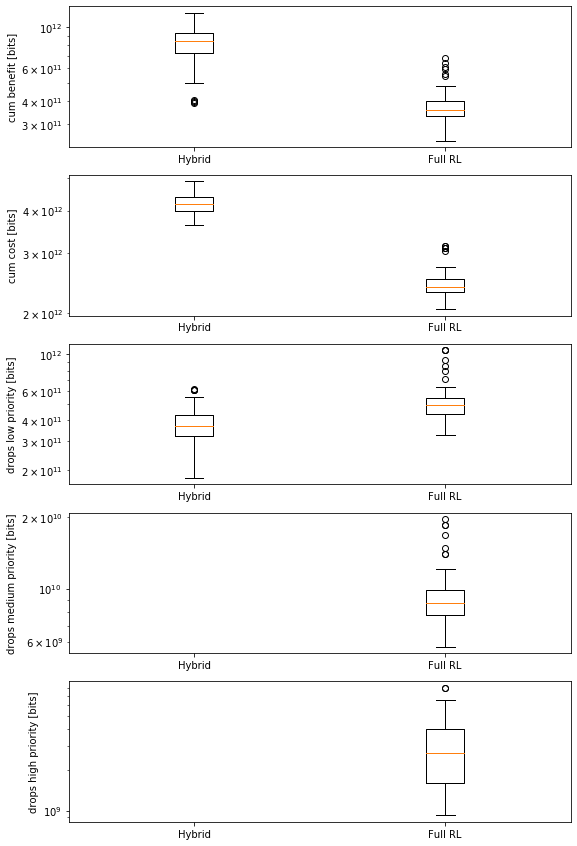

In [11]:
data = [data8, data16]
plot_boxplot_comparison(data)